# Classification af CIFAR10

**Koden nedenunder at inspireret af Pytorchs egen dokumentation** [Link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?fbclid=IwAR0O2KqQUnO6hsT4MUtBzKY6Kd-nGJlDTm9lX21NoZ1nsgJ4QtTdHoZxDak_aem_AZSP_0YK3PhA1-BKk0ki7pxwIYligxUcsGimccbCXOfh_eb10tFY81REdqiHy4aGULiIAxDV2wLrcorGGkwY3Lw8)

In [54]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from dataset_tools import OwnDataset
import torch.nn as nn

## Indlæsning af data:

**The output of torchvision datasets are PILImage images of range [0, 1]. We transform them to Tensors of normalized range [-1, 1].**

In [55]:
cuda = torch.cuda.is_available()

batch_size = 64

tf = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
])

data_train = OwnDataset(train=True, transform=tf)
data_test = OwnDataset(train=False, transform=tf)

train_loader = DataLoader(data_train, batch_size=batch_size, shuffle=True, pin_memory=cuda)
test_loader = DataLoader(data_test, batch_size=batch_size, shuffle=True, pin_memory=cuda)

## Model definition

In [56]:
from models import VAE_CELL_CNN_CLASSIFIER

model = VAE_CELL_CNN_CLASSIFIER(input_dim=(3,68,68), hidden_dim=512, latent_dim=2)
if cuda:
    model.cuda()

ImportError: cannot import name 'VAE_CELL_CNN_CLASSIFIER' from 'models' (/Users/bsm/Desktop/Project/02466-Cell-Profiling/models.py)

## Optimizer

In [ ]:
import torch.optim as optim
from loss_functions import loss_function  # Sørg for, at denne er korrekt defineret

optimizer = optim.Adam(model.parameters(), lr=1e-3)

## Loss function

In [ ]:
def vae_loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD


## Training loop

In [ ]:
num_epochs = 10  # Angiv antallet af epoker

for epoch in range(num_epochs):
    model.train()  # Sæt model til træningstilstand
    train_loss = 0  # Initialiser tab til at akkumulere over epoken

    for x, _ in train_loader:
        if cuda:
            x = x.cuda()  # Flyt data til GPU hvis tilgængelig

        optimizer.zero_grad()  # Nulstil gradienter
        x_hat, mu, logvar = model(x)  # Fremadpas
        loss = vae_loss_function(x_hat, x, mu, logvar)  # Beregn tab
        loss.backward()  # Backpropagation
        optimizer.step()  # Opdater modelparametre

        train_loss += loss.item()  # Akkumuler tabet

    # Loggning efter hver epoke
    average_loss = train_loss / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}')


RuntimeError: all elements of input should be between 0 and 1

In [ ]:
print(x_hat.min().item(), x_hat.max().item())


-0.17855025827884674 0.07852745801210403


## Comparison

In [ ]:
# Vis rekonstruerede versus originale billeder
plot_image_comparison(model, test_loader, cuda, img_shape=(3,68,68))

# Generer og vis nye billeder fra den latente rum
plot_random_images(model, n=10, img_shape=(3,68,68), cuda=cuda)


## Visualisering af trainingsbilleder 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


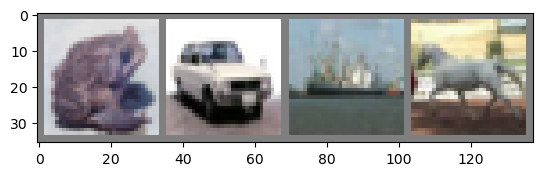

frog  car   ship  horse


In [ ]:
# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## Opsættelse af Convolutional Neural Network

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

## Funktioner til evaluering af CNN (Loss function)

In [ ]:
import torch.optim as optim

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Træning af netværket

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.203
[1,  4000] loss: 1.845
[1,  6000] loss: 1.648
[1,  8000] loss: 1.567
[1, 10000] loss: 1.526
[1, 12000] loss: 1.464
[2,  2000] loss: 1.394
[2,  4000] loss: 1.364
[2,  6000] loss: 1.369
[2,  8000] loss: 1.306
[2, 10000] loss: 1.315
[2, 12000] loss: 1.300
Finished Training


In [ ]:
# Gem modellen:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## Visualisering af testdata

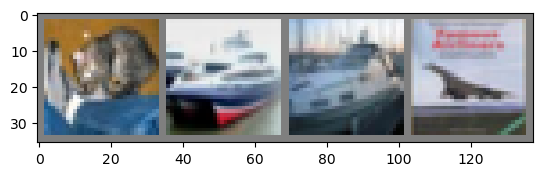

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

## Output fra modellen

I denne blok, er formålet at se hvor godt den gætter de første fire elementer i testsettet, som er visualiseret i "Visualisering af testdata"

In [ ]:
#Indlæs model (Det er i virkeligheden ikke nødvendigt, men det bliver gjort for at vise hvordan man gør)
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### Test på de fire første i testset

In [ ]:
#The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network thinks that the image is of the particular class.
# So, let’s get the index of the highest energy:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  frog  plane car   plane


### Test på hele datasættet

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


## Ekstra overvejelser:

### Hvilke klasser klarede sig bedst?

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 61.6 %
Accuracy for class: car   is 71.2 %
Accuracy for class: bird  is 31.7 %
Accuracy for class: cat   is 23.2 %
Accuracy for class: deer  is 43.2 %
Accuracy for class: dog   is 45.9 %
Accuracy for class: frog  is 82.4 %
Accuracy for class: horse is 68.9 %
Accuracy for class: ship  is 66.5 %
Accuracy for class: truck is 45.5 %
